<a href="https://colab.research.google.com/github/VaeriaBautista/Simulaci-n-I/blob/main/Generador_Congruencial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

    Índice  Número Generado
0        1         0.000003
1        2         0.000420
2        3         0.060857
3        4         0.824212
4        5         0.510725
..     ...              ...
95      96         0.273674
96      97         0.682663
97      98         0.986167
98      99         0.994218
99     100         0.161666

[100 rows x 2 columns]


<ipython-input-8-979aba439939>:69: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout()


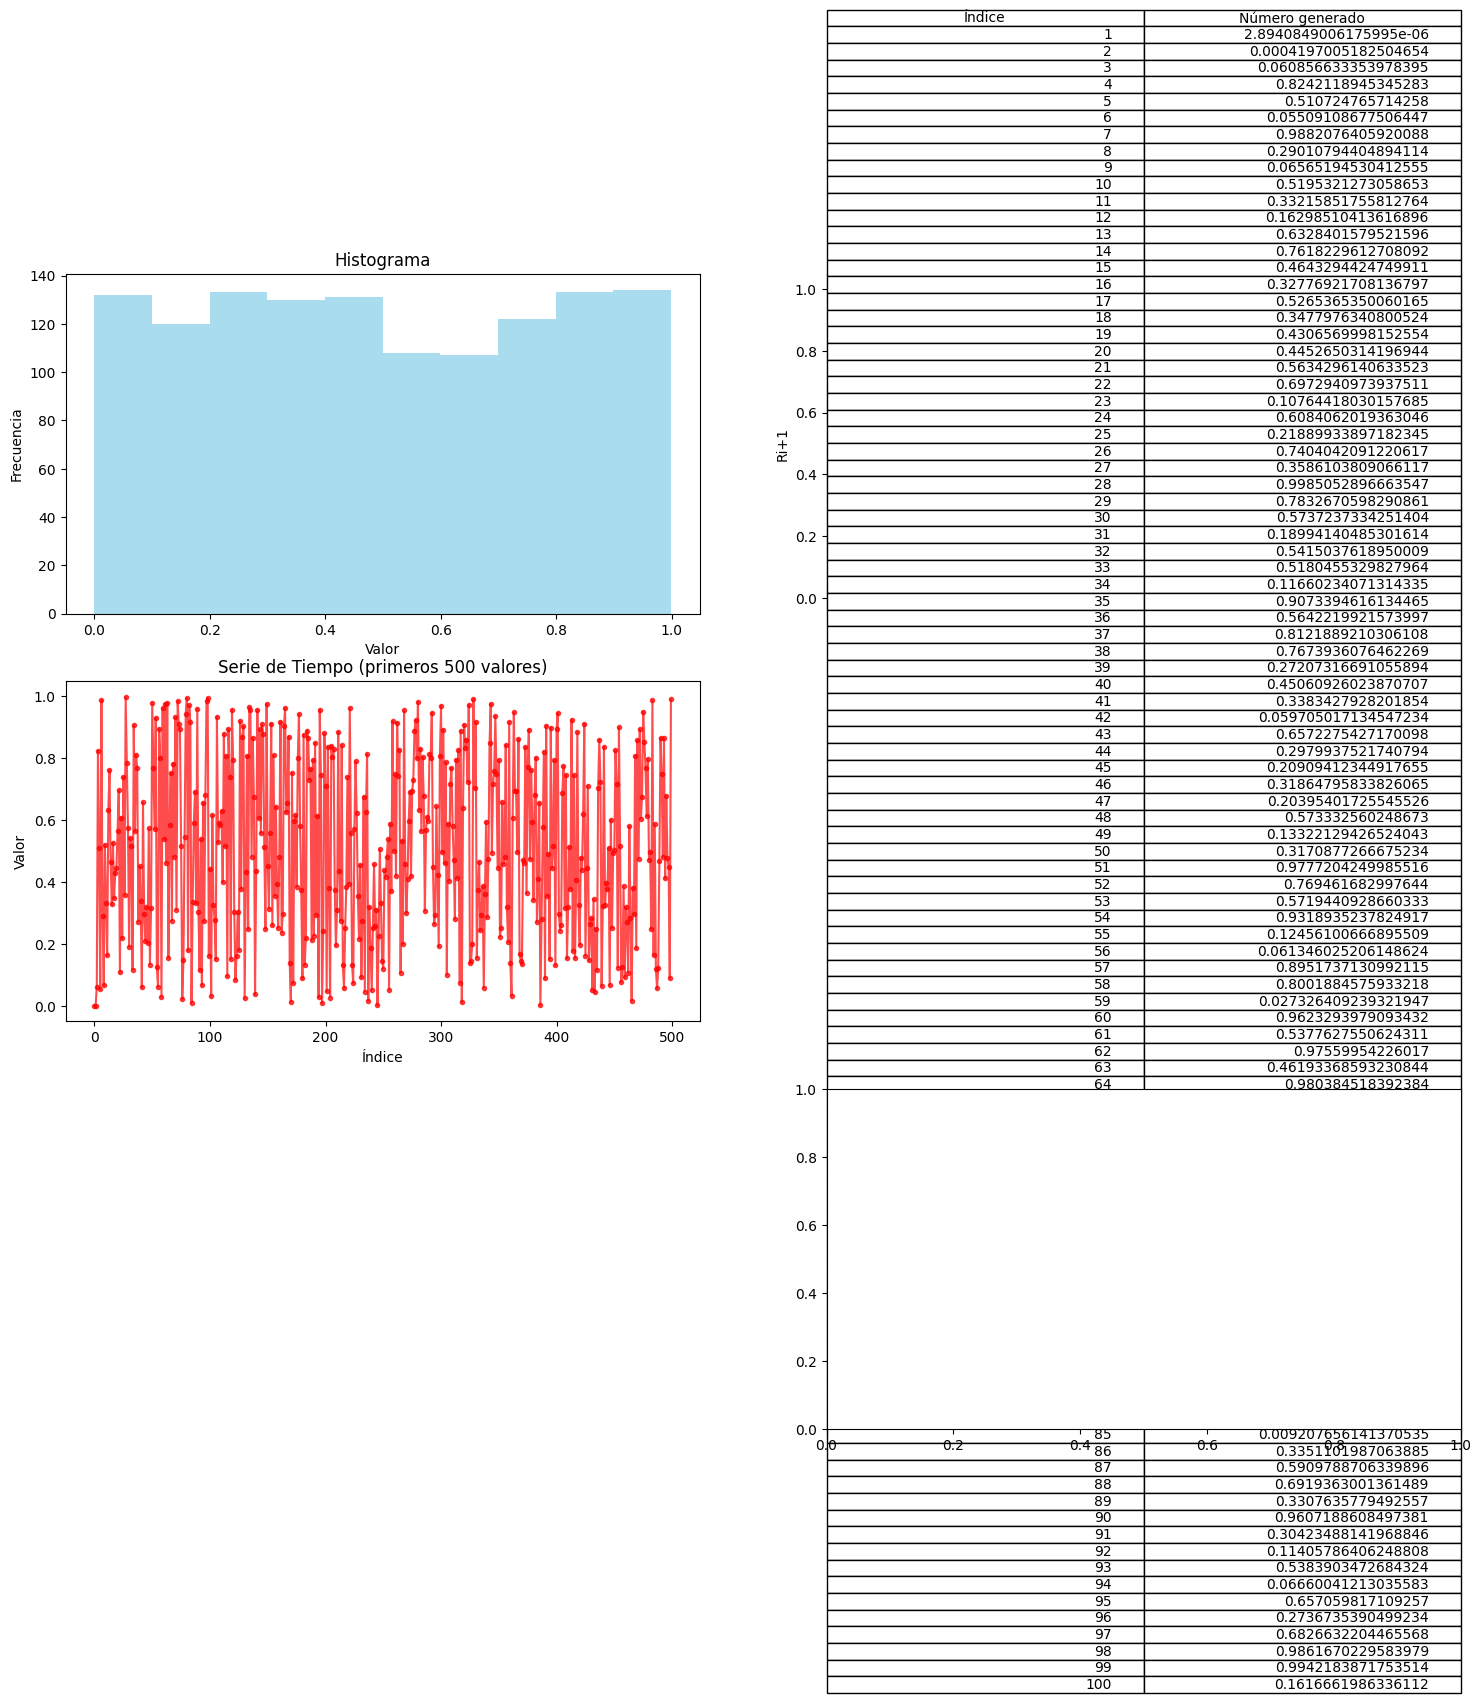

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import pandas as pd

class GeneradorCongruencial:
    def __init__(self, semilla=1, multiplicador=1103515245, incremento=12345, modulo=2**31):
        self.semilla = semilla
        self.multiplicador = multiplicador
        self.incremento = incremento
        self.modulo = modulo
        self.x_actual = semilla
        self.secuencia = []

    def generar_numero(self):
        self.x_actual = (self.multiplicador * self.x_actual + self.incremento) % self.modulo
        return self.x_actual / self.modulo

    def generar_secuencia(self, n):
        self.secuencia = [self.generar_numero() for _ in range(n)]
        return self.secuencia

    def generar_secuencia_hasta_repeticion(self):
        rand = set()
        secuencia = []
        xn = self.semilla
        while xn not in rand:
            rand.add(xn)
            secuencia.append(xn / self.modulo)
            xn = (self.multiplicador * xn + self.incremento) % self.modulo
        self.secuencia = secuencia
        return self.secuencia

    def generar_visualizaciones(self):
        if not self.secuencia:
            return None

        fig, axs = plt.subplots(3, 2, figsize=(18, 15))

        axs[0, 0].hist(self.secuencia, bins=10, alpha=0.7, color='skyblue')
        axs[0, 0].set_title('Histograma')
        axs[0, 0].set_xlabel('Valor')
        axs[0, 0].set_ylabel('Frecuencia')

        if len(self.secuencia) > 1:
            pares = [(self.secuencia[i], self.secuencia[i+1]) for i in range(min(len(self.secuencia)-1, 500))]
            x_coords, y_coords = zip(*pares)
            axs[0, 1].scatter(x_coords, y_coords, alpha=0.5, s=10, color='green')
            axs[0, 1].set_title('Prueba de Independencia')
            axs[0, 1].set_xlabel('Ri')
            axs[0, 1].set_ylabel('Ri+1')

        axs[1, 0].plot(self.secuencia[:500], marker='o', linestyle='-', markersize=3, alpha=0.7, color='red')
        axs[1, 0].set_title('Serie de Tiempo (primeros 500 valores)')
        axs[1, 0].set_xlabel('Índice')
        axs[1, 0].set_ylabel('Valor')

        tabla_datos = [[i+1, valor] for i, valor in enumerate(self.secuencia[:100])]
        col_labels = ['Índice', 'Número generado']
        axs[1, 1].axis('tight')
        axs[1, 1].axis('off')
        tabla = axs[1, 1].table(cellText=tabla_datos, colLabels=col_labels, loc='center')
        tabla.auto_set_font_size(False)
        tabla.set_fontsize(10)

        axs[2, 0].axis('off')

        fig.tight_layout()
        return fig

def ejecutar_simulacion(semilla=1, multiplicador=145, incremento=125, modulo=2**31, n=1250, hasta_repeticion=False):
    generador = GeneradorCongruencial(semilla, multiplicador, incremento, modulo)

    if hasta_repeticion:
        secuencia = generador.generar_secuencia_hasta_repeticion()
    else:
        secuencia = generador.generar_secuencia(n)

    df = pd.DataFrame({'Índice': range(1, len(secuencia) + 1), 'Número Generado': secuencia})
    print(df.head(100))  # Solo mostramos los primeros 100 valores para evitar lentitud

    fig = generador.generar_visualizaciones()
    plt.show()

    return generador

if __name__ == "__main__":
    gen = ejecutar_simulacion(semilla=42, hasta_repeticion=False)
